In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [35]:
import re
from textblob import TextBlob
from wordcloud import WordCloud

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

## Get filtered data

In [2]:
data_company_twt = pd.read_csv('1.tesla_tweets_data.csv')
data_company_twt

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
1,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
2,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
3,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
4,550443857142611968,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
1096863,1212158772015034369,StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0
1096864,1212159099632267268,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0
1096865,1212159184931717120,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0
1096866,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1


In [5]:
data_company_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096868 entries, 0 to 1096867
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   tweet_id     1096868 non-null  int64 
 1   writer       1073202 non-null  object
 2   post_date    1096868 non-null  int64 
 3   body         1096868 non-null  object
 4   comment_num  1096868 non-null  int64 
 5   retweet_num  1096868 non-null  int64 
 6   like_num     1096868 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 58.6+ MB


## Filter tweets by tag --> all tweets contains tsla tag

In [22]:
print(data_company_twt['body'][0])
print('--------------')
print('$tsla' not in data_company_twt['body'][0].lower())

$GM $TSLA: Volkswagen Pushes 2014 Record Recall Tally Higher https://pic.twitter.com/WIIc1lW7hW @ProTradersNews http://growword.com/2015/01/01/0246.html… @theferrarifan
--------------
False


In [30]:
#list of tweets not contains $TSLA
to_delete = []
for i in data_company_twt.index:
    if ('$tsla' not in data_company_twt['body'][0].lower()):
        to_delete.append(i)

In [31]:
len(to_delete),to_delete

(0, [])

In [32]:
data_company_twt['body'][20]

'$tsla $scty Just gotta wait and be patient with these... Sucks, huh?'

### prepare 'date' column

In [7]:
Dtime = []

timestamp = data_company_twt['post_date']
for i in data_company_twt.index:
    dt_object = datetime.fromtimestamp(data_company_twt['post_date'][i])
    Dtime.append(dt_object)
    
    #print("dt_object =", dt_object)
    #print("type(dt_object) =", type(dt_object))

data_company_twt['Dtime'] = Dtime
data_company_twt['Dtime']

0         2015-01-01 01:06:47
1         2015-01-01 01:10:05
2         2015-01-01 01:10:05
3         2015-01-01 01:10:05
4         2015-01-01 01:10:16
                  ...        
1096863   2020-01-01 00:49:06
1096864   2020-01-01 00:50:24
1096865   2020-01-01 00:50:45
1096866   2020-01-01 00:53:21
1096867   2020-01-01 00:54:03
Name: Dtime, Length: 1096868, dtype: datetime64[ns]

### prepare the date column, '%Y-%m-%d' format

In [36]:
dates = []

for i in data_company_twt.index:
    #dtime = str(data_company_twt['date'][i])
    dates.append(datetime.strftime(datetime.strptime(str(data_company_twt['Dtime'][i]),'%Y-%m-%d %H:%M:%S'), '%Y-%m-%d'))
    
data_company_twt['date'] = dates

In [37]:
data_company_twt

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,Dtime,date
0,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,2015-01-01 01:06:47,2015-01-01
1,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:05,2015-01-01
2,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:05,2015-01-01
3,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:05,2015-01-01
4,550443857142611968,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:16,2015-01-01
...,...,...,...,...,...,...,...,...,...
1096863,1212158772015034369,StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,2020-01-01 00:49:06,2020-01-01
1096864,1212159099632267268,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0,2020-01-01 00:50:24,2020-01-01
1096865,1212159184931717120,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0,2020-01-01 00:50:45,2020-01-01
1096866,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,2020-01-01 00:53:21,2020-01-01


## sentiment analysis using textblob

In [38]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

# df["cleaned_tweet"].unique()

In [39]:
#clean tweets
def cleanTwt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove mentions
    text = re.sub(r'[0-9]+', '', text) #remove numbers
    text = re.sub(r'\[', '', text) #remove [ symbole
    text = re.sub(r'\]', '', text) #remove ] symbole
    text = re.sub(r'\n', '', text) #remove \n 
    text = re.sub(r'/', '', text) #remove / symbole
    text = re.sub(r'#', '', text) #remove # symbole
    #text = re.sub(r'RT[\s]+', '', text) # retweet RT
    text = re.sub(r'http?:\/\/S+', '', text) #remove the hyper link
    
    return text

In [47]:
stopwords_set = set(stopwords.words("english"))
nltk.download('stopwords')
punctuations = string.punctuation
nltk.download('punkt')

def preprocess_tweet_text(tweet):
    tweet = tweet.lower()
    tweet = remove_html(tweet)
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    #tweet= tweet.replace("[^a-zA-Z0–9]", " ")
    # Tokenization
    tweet_tokens = word_tokenize(tweet)
    # Remove stopwords
    filtered_words = [w for w in tweet_tokens if w not in stopwords_set and w not in punctuations]
    

    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mariame\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mariame\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
data_company_twt['cleaned_text'] = data_company_twt['body'].apply(preprocess_tweet_text)
data_company_twt['cleaned_text'] = data_company_twt['cleaned_text'].apply(cleanTwt)

### word cloud

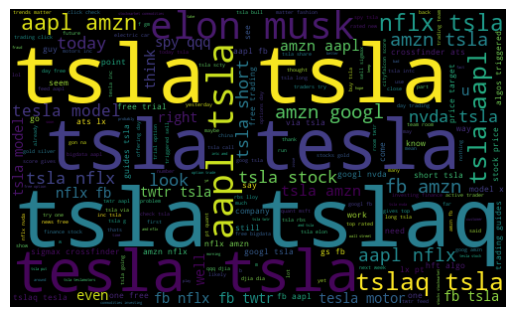

In [49]:
allWords = ' '.join( [twts for twts in data_company_twt['cleaned_text']])
wordCloud = WordCloud(width = 500, height =300, random_state = 21 ,max_font_size = 119).generate(allWords)

plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### calculate sentiment score

In [52]:
def getSujectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    
    return TextBlob(text).sentiment.polarity

data_company_twt['Subjuctivity'] = data_company_twt['cleaned_text'].apply(getSujectivity)
data_company_twt['Polarity'] = data_company_twt['cleaned_text'].apply(getPolarity)

### create the sentiment classes and one hot encoding

In [53]:
# 2 is negative
# 0 is neutrall
# 1 is positive

def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif(score == 0):
        return 'neutral'
    else:
        return 'positive'
    
data_company_twt['Class_sentiment'] = data_company_twt['Polarity'].apply(getAnalysis)

In [54]:
data_company_twt.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,Dtime,date,cleaned_text,Subjuctivity,Polarity,Class_sentiment
0,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,2015-01-01 01:06:47,2015-01-01,gm tsla volkswagen pushes record recall tally...,0.5,0.25,positive
1,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:05,2015-01-01,swing trading return days swingtrading forec...,0.0,0.00,neutral
2,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:05,2015-01-01,swing trading return days swingtrading forec...,0.0,0.00,neutral
3,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:05,2015-01-01,swing trading return days swingtrading forec...,0.0,0.00,neutral
4,550443857142611968,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:16,2015-01-01,swing trading return days swingtrading forec...,0.0,0.00,neutral


In [55]:
data_company_twt_sentim = pd.get_dummies(data_company_twt, columns = ['Class_sentiment'])
data_company_twt_sentim

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,Dtime,date,cleaned_text,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive
0,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,2015-01-01 01:06:47,2015-01-01,gm tsla volkswagen pushes record recall tally...,0.500000,0.250000,0,0,1
1,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:05,2015-01-01,swing trading return days swingtrading forec...,0.000000,0.000000,0,1,0
2,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:05,2015-01-01,swing trading return days swingtrading forec...,0.000000,0.000000,0,1,0
3,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:05,2015-01-01,swing trading return days swingtrading forec...,0.000000,0.000000,0,1,0
4,550443857142611968,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01 01:10:16,2015-01-01,swing trading return days swingtrading forec...,0.000000,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096863,1212158772015034369,StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,2020-01-01 00:49:06,2020-01-01,im getting wasted nye thanks approved tsla aut...,0.100000,0.000000,0,1,0
1096864,1212159099632267268,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0,2020-01-01 00:50:24,2020-01-01,tsla interesting dude,0.500000,0.500000,0,0,1
1096865,1212159184931717120,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0,2020-01-01 00:50:45,2020-01-01,brought selfawareness tesla autopilot asshole...,0.000000,0.000000,0,1,0
1096866,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,2020-01-01 00:53:21,2020-01-01,may start tweeting positive news xom cvx mcep...,0.472727,-0.036364,1,0,0


In [56]:
data_company_twt_sentim.to_csv(r'2.tesla_data_dates_sentiment_analysis.csv', index=False)